## Create coutouts

Here is a script that does the following:

- Reads the positions (RA, DEC) from a file of LSB candidates

- Gets cutouts from the DECaLS legacy viewer - saves them as jpg images 

- Displays them in a way that allows us a convenient and fast classification

In [101]:
import numpy as np 
import urllib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
# Read the file that contains RAs and DECs of LSB candidates 
ra, dec = np.loadtxt("ForClassification.dat", usecols=(0,1), unpack=3)

# Calculate the length - the number of the candidates - it is going to be useful
N_cand = len(ra)

Now create the cutouts - save as jpg files all the candidates. An extra input here is the zoom. By default I will put zoom = 15, but I will write the script in a way to make this easy to change.

In [103]:
import time
zoom = 15

# Let's also time it
tim_in = time.time()

for i in range(51):
    # Give a name to the figure. Name them as "Image_cand_(i).jpb
    # Where i is the number of the candidate
    # This is easy to change to ra, dec or coadd ID or whatever...
    fig_name = "Image_cand_{0}.jpg".format(i)
    
    #Create now the name of the URL
    # This need to have as inputs (that change) the RA, DEC of each objec and zoom
    RA_loc = ra[i] #The RA of the i-th object
    DEC_loc = dec[i] # The DEC of the i-th object
    
    url_name = "http://legacysurvey.org//viewer/jpeg-cutout?ra={0}&dec={1}&zoom={2}&layer=des-dr1".format(RA_loc,DEC_loc,zoom)
    
    urllib.urlretrieve(url_name, fig_name) #Retreaves and saves each image
    
    # Leaving this here as an alternative way to do it
    #f = open(fig_name,'wb') #Open file and give name to save figure
    #f.write(urllib.urlopen(url_name).read()) #Open and read image from url
    #f.close() # Close the file
    
tim_fin = time.time()
print("Time to produce the figures (in minutes):")
print((tim_fin-tim_in)/60.0)

Time to produce the figures (in minutes):
0.756399619579


### Now display them

Let's now display them, in order to inspect and classify them

In [104]:
from IPython.display import Image
from PIL import Image

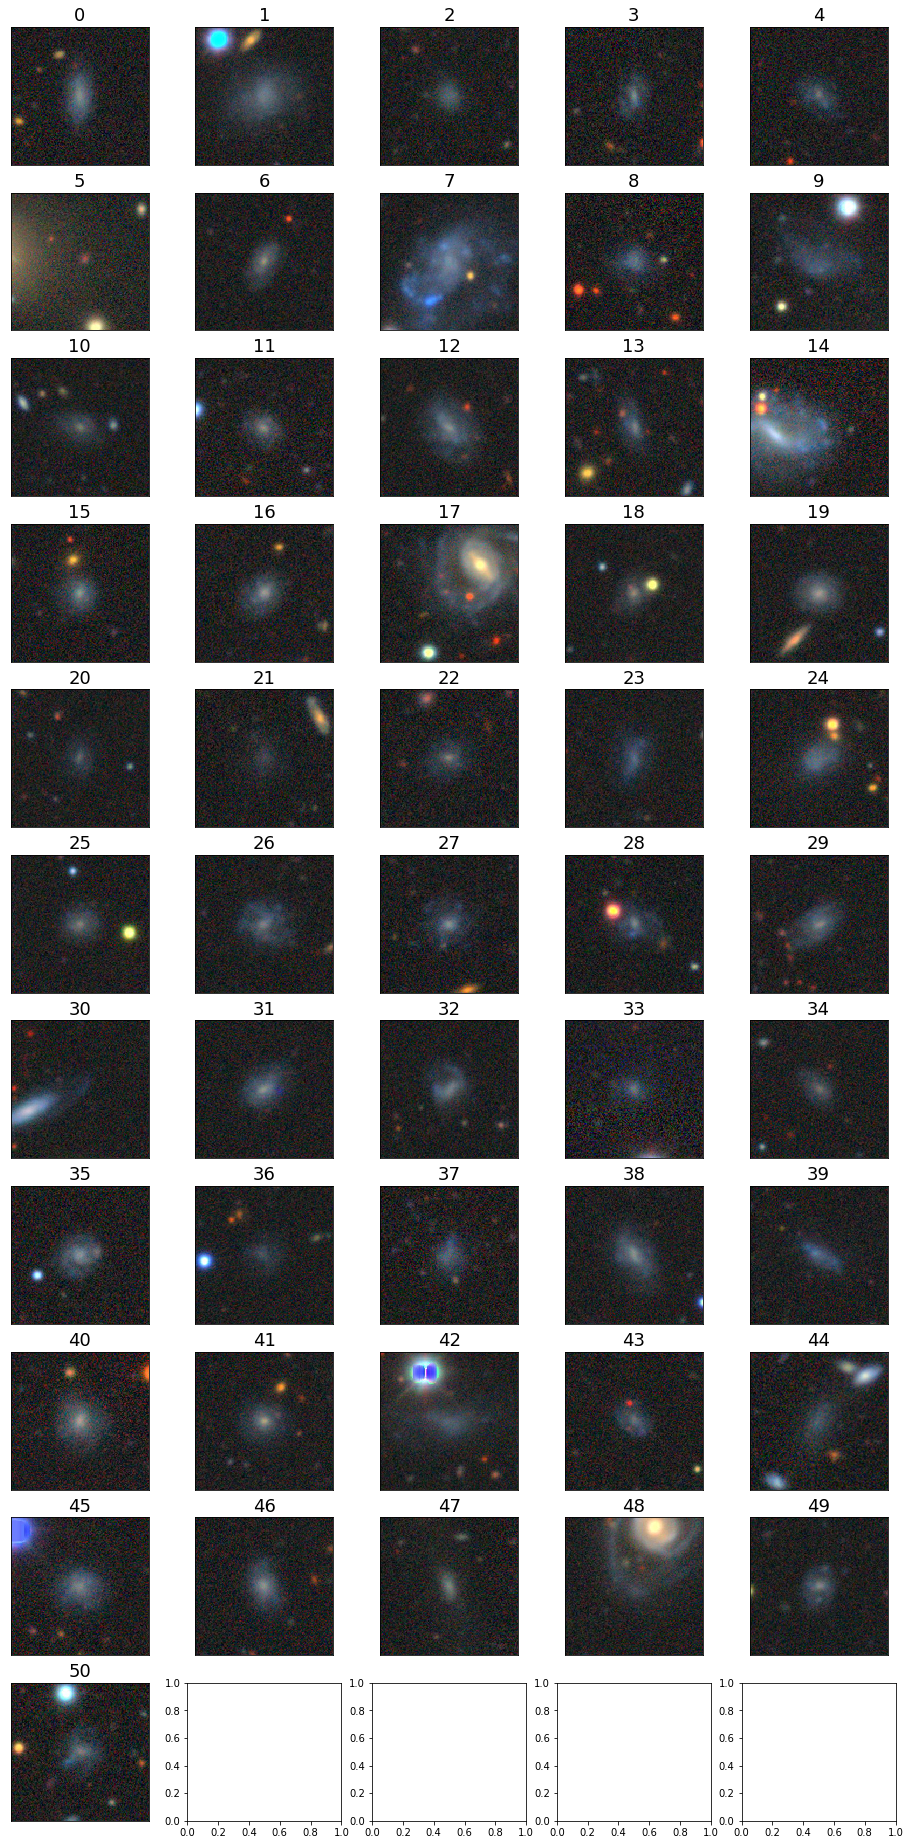

In [106]:
n_cols = 5
n_rows = int(50/n_cols)+1

fig,ax = plt.subplots(n_rows,n_cols, figsize=(16,3*n_rows))

for i in range(51):
    fig_name = "Image_cand_{0}.jpg".format(i)
    image = Image.open(fig_name)
    ax[i//5][i%5].imshow(image)
    ax[i//5][i%5].set_title("{0}".format(i), fontsize=18)
    ax[i//5][i%5].set_xticks([]) # Remove x ticks
    ax[i//5][i%5].set_yticks([]) # Remove y ticks
    
    
fig.show()